In [1]:
# 设置中文字体
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font", family="SimHei") 

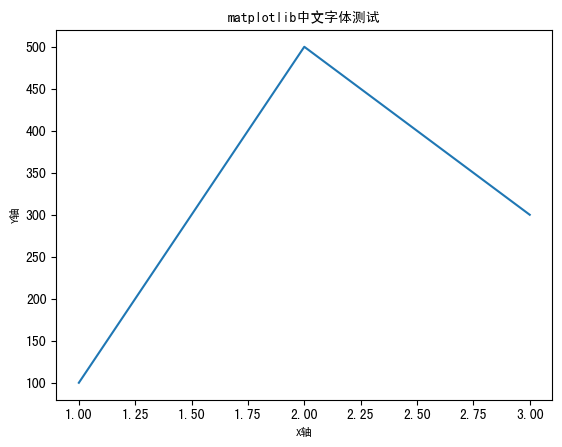

In [2]:
# 中文字体测试
plt.plot([1,2,3], [100,500,300])
plt.title("matplotlib中文字体测试", fontsize=10)
plt.xlabel("X轴", fontsize=8)
plt.ylabel("Y轴", fontsize=8)
plt.show()

In [3]:
# 检查CUDA
import torch, torchvision
print(torch.cuda.is_available())

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True


In [ ]:
# # 下载MMSegmentation
# !rm -rf mmsegmentation

In [ ]:
# # 从 github 上下载最新的 mmsegmentation 源代码
# !git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

In [3]:
# 安装openmim
!pip install -U openmim

In [4]:
# 安装mmengine、mmcv和mmdet
!mim install mmengine
!mim install 'mmcv==2.0.0rc4'
!mim install 'mmdet>=3.0.0rc1' -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 13.2 kB/s eta 0:00:00a 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 13.2 kB/s eta 0:00:00a 0:00:02
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 MB 2.0 MB/s eta 0:00:0000:0100:01
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 153.3 MB/s eta 0:00:00
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp38-cp38-linux_x86_64.whl size=423870 sha

In [5]:
# 通过mim基于源码进行安装
%cd mmsegmentation
!pip install -v -e . -i https://pypi.tuna.tsinghua.edu.cn/simple 
%cd -

/gemini/code/MMSegmentation Tutorial/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///gemini/code/MMSegmentation%20Tutorial/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-cly252q_/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  writing 

In [1]:
import sys
import os
# sys.path.insert(1, os.path.join(os.getcwd(), "mmsegmentation"))

# 检查mmsegmentation版本
import mmseg
print(mmseg.__version__)

1.0.0


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

2.0.0rc4
11.3
GCC 9.3


In [15]:
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.patches as mpatches
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset
from mmengine.config import Config
from mmengine.runner import set_random_seed
from mmseg.apis import init_model, show_result_pyplot, inference_model
from mmengine.runner import Runner
import cv2

### 自定义数据集

In [4]:
@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
    # 定义类别名和调色板
    METAINFO = dict(classes = ("background", "red", "green", "white ", "seed-black", "seed-white"), 
                    palette = [[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], \
                               [5, 5, 5]])
    def __init__(self, **kwargs):
        super().__init__(img_suffix=".jpg", seg_map_suffix=".png", **kwargs)

### 模型训练

In [5]:
# cfg = Config.fromfile("mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py")
cfg = Config.fromfile("custom_config_pspnet_r50.py")

# 输出配置文件内容
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
batch_size = 8
num_classes = 6
work_dir = 'exps'
dataset_type = 'WatermelonDataset'
data_root = 'data/Watermelon87_Semantic_Seg_Mask/'
crop_size = (512, 1024)
load_from = 'checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
resume = False
seed_num = 2023
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomResize',
        scale=(2048, 1024),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(512, 1024), cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]
val_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]
max_iters = 400
logger_interval = 20
val_interval = 10
checkpoint_interval = 10
sav

In [9]:
runner = Runner.from_cfg(cfg)

06/19 16:50:39 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.10 (default, Mar 13 2023, 10:26:41) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 2023
    GPU 0: S2.gpu.large
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.3, V11.3.109
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,co

/gemini/code/MMSegmentation Tutorial/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/gemini/code/MMSegmentation Tutorial/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/gemini/code/MMSegmentation Tutorial/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/19 16:50:54 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/19 16:50:54 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/gemini/code/MMSegmentation Tutorial/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [10]:
# 开始训练
runner.train()

06/19 16:50:55 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/19 16:50:56 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/19 16:50:56 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/19 16:50:56 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([6, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([6]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param wit

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### 模型推理

In [17]:
# 载入配置文件
cfg = Config.fromfile("custom_config_pspnet_r50.py")

In [18]:
# 载入模型权重
checkpoint_path = "exps/best_mIoU_iter_370.pth"
model = init_model(cfg, checkpoint_path, "cuda:0")

Loads checkpoint by local backend from path: exps/best_mIoU_iter_370.pth


In [19]:
img_dir = "pics"
imgs = glob("pics/*.jpg")

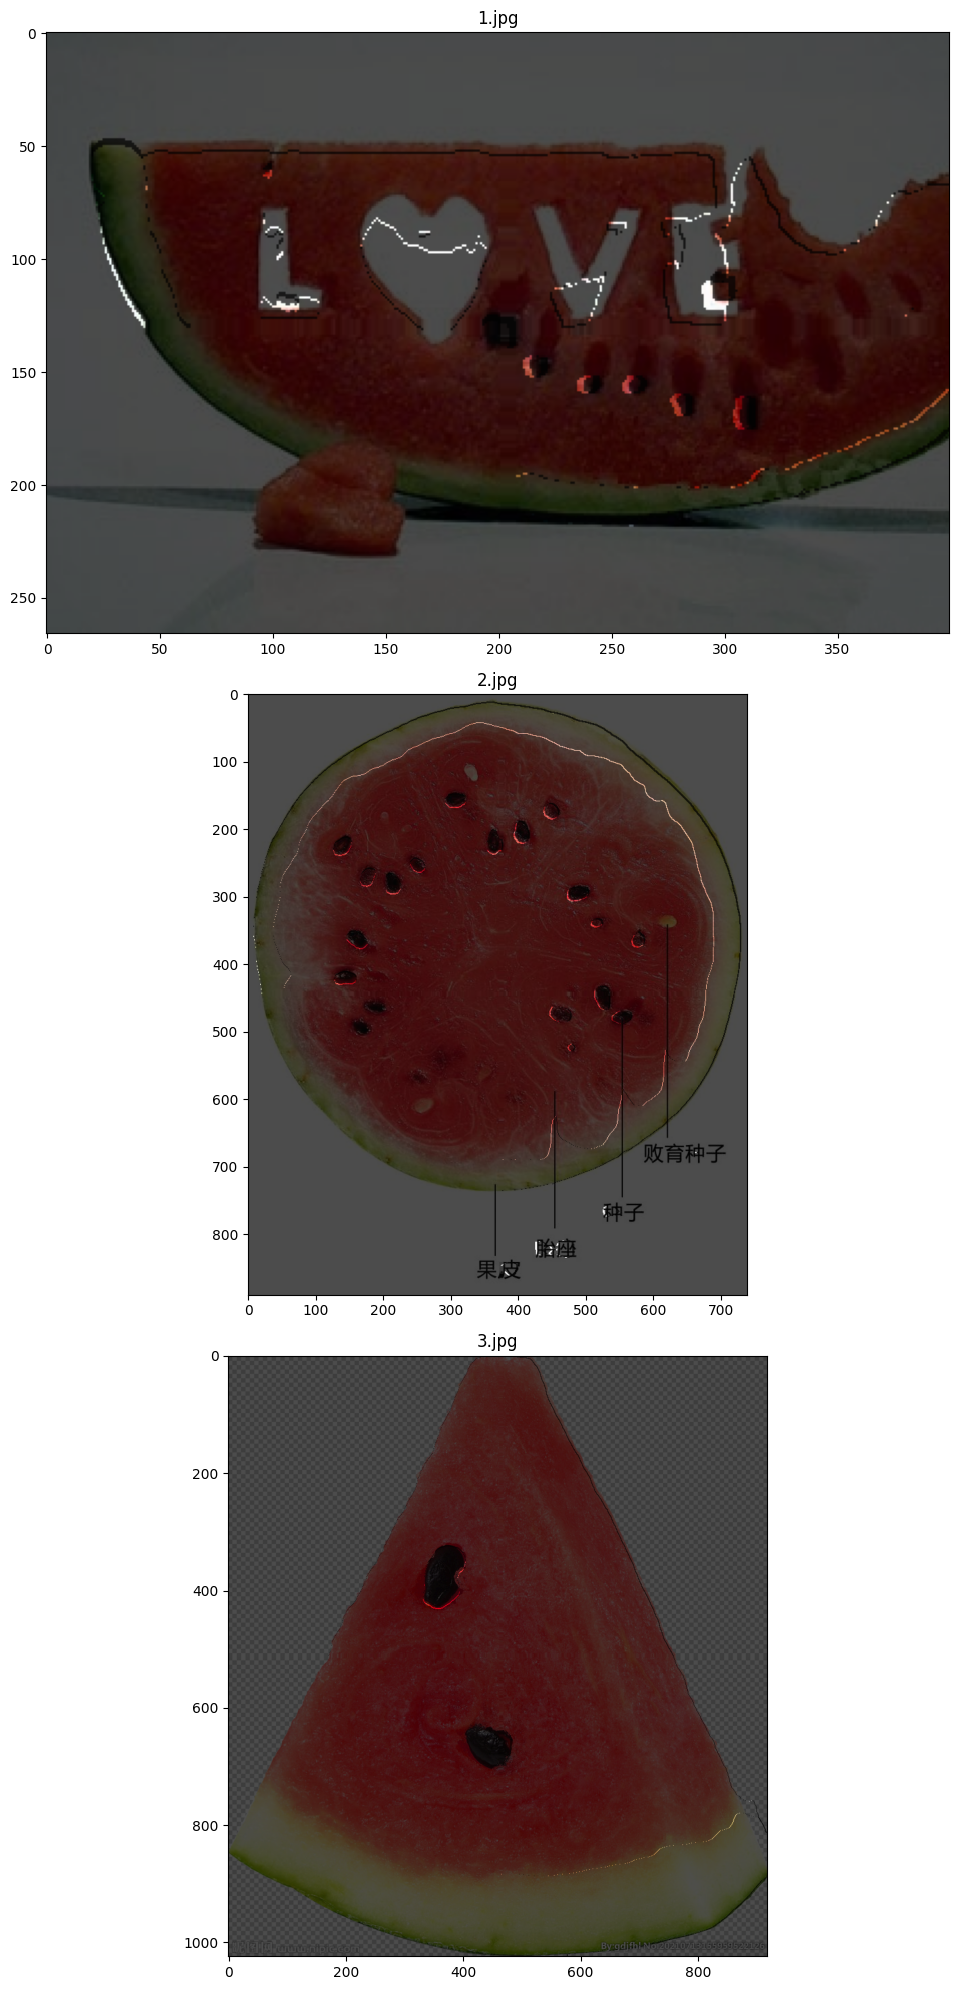

In [26]:
# 对一些从网络上采集来的西瓜图片进行推理
plt.figure(figsize=(20, 20))
for i, img in enumerate(imgs):
    img_name = os.path.split(img)[-1]
    result = inference_model(model, img)
    visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
    plt.subplot(len(imgs), 1, i+1)
    plt.imshow(mmcv.bgr2rgb(visualization))
    plt.title(img_name)
plt.tight_layout()